In [88]:
import numpy as np
import matplotlib.pyplot as plt
from src import quant_utils

In [68]:
%matplotlib inline

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
np.random.seed(0)

In [84]:
a = np.random.randn(30, 40)

In [85]:
b = np.random.randn(40, 20)

In [86]:
a

array([[ 0.61334917,  1.84369998,  0.27109098, ...,  1.32486827,
         0.84064848,  0.26110618],
       [ 0.79444165, -0.64961649,  0.63428451, ..., -0.84961402,
        -0.98189969, -1.36307767],
       [-0.77259856, -0.28362545, -2.32760404, ..., -2.53851113,
         1.01009078,  0.08570209],
       ...,
       [ 0.1786202 ,  0.78168115, -0.5246404 , ..., -1.10728842,
         0.13528253, -1.05277762],
       [ 2.05229342,  0.98530892, -0.37284012, ..., -1.01878353,
         0.66161633, -0.89203853],
       [ 0.55188939,  1.37132997,  0.77088544, ...,  2.17299592,
        -0.06873078, -0.2313193 ]])

In [49]:
out = a.dot(b)

In [71]:
a_q, a_range, a_offset = quant_utils.quantize_mat(a)
b_q, b_range, b_offset = quant_utils.quantize_mat(b)

In [72]:
matmul_res = quant_utils.uint8_matmul(a_q, -a_offset, a_range, b_q, -b_offset, b_range)

In [73]:
quant_utils.compute_error(out, matmul_res)

0.010516147309067659

(array([ 11.,  39., 105., 223., 272., 250., 178.,  81.,  30.,  11.]),
 array([-2.85353393, -2.26292894, -1.67232395, -1.08171896, -0.49111397,
         0.09949102,  0.69009601,  1.280701  ,  1.87130599,  2.46191098,
         3.05251597]),
 <a list of 10 Patch objects>)

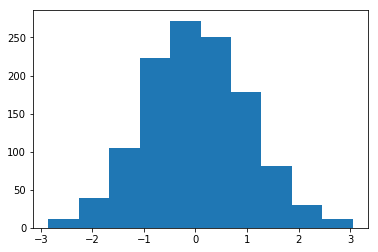

In [70]:
plt.hist(a.flatten())

(array([  2.,  26.,  63., 120., 167., 167., 146.,  73.,  26.,  10.]),
 array([-3.00973185, -2.40962751, -1.80952318, -1.20941885, -0.60931451,
        -0.00921018,  0.59089416,  1.19099849,  1.79110283,  2.39120716,
         2.99131149]),
 <a list of 10 Patch objects>)

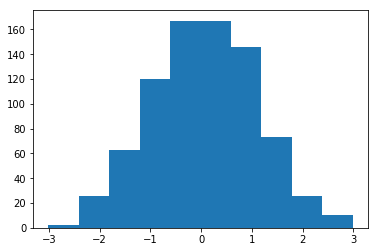

In [74]:
plt.hist(b.flatten())

**The error is so small due to perfect distribution of two matrix, we'll see what happens when distribution is not so well**

In [113]:
a_noise = quant_utils.add_noise(a, noise_prob=0.05, noise_level=10)

(array([  3.,   3.,   2.,   4., 327., 835.,  10.,   9.,   6.,   1.]),
 array([-22.41448968, -18.04464523, -13.67480078,  -9.30495633,
         -4.93511188,  -0.56526743,   3.80457702,   8.17442147,
         12.54426592,  16.91411038,  21.28395483]),
 <a list of 10 Patch objects>)

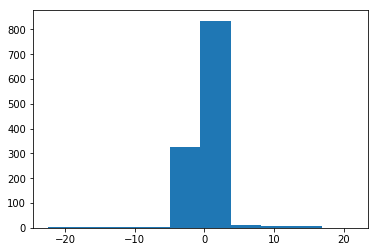

In [114]:
plt.hist(a_noise.flatten())

In [115]:
a_q, a_range, a_offset = quant_utils.quantize_mat(a_noise)
b_q, b_range, b_offset = quant_utils.quantize_mat(b)

In [116]:
matmul_res = quant_utils.uint8_matmul(a_q, -a_offset, a_range, b_q, -b_offset, b_range)
out = a_noise.dot(b)

In [117]:
quant_utils.compute_error(out, matmul_res)

0.02867418814389324